In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Download data

current_year = datetime.now().year
r = requests.get(f'http://andmebaas.stat.ee/sdmx-json/data/RAA0012/I+II+III+IV.1.1/all?startTime=1995&endTime={current_year}&dimensionAtObservation=allDimensions')
data = r.json()

In [3]:
# Extract data from json

Q1 = []
Q2 = []
Q3 = []
Q4 = []

for k, v in data['dataSets'][0]['observations'].items():
    if k[0] == '0':
        Q1.append(v[0])
    elif k[0] == '1':
        Q2.append(v[0])
    elif k[0] == '2':
        Q3.append(v[0])
    elif k[0] == '3':
        Q4.append(v[0])

# If data for some quarters is not available for the current year then add missing values to the dataframe

for q in [Q2, Q3, Q4]:
    if len(Q1) > len(q):
        q.append(np.nan)

years = []
for y in data['structure']['dimensions']['observation'][3]['values']:
    years.append(int(y['id']))

In [4]:
# Create DataFrame

gdp = pd.DataFrame(data={'Q1':Q1, 'Q2':Q2,'Q3':Q3, 'Q4':Q4},
                   index=years)

pd.set_option('display.precision', 0)
gdp.tail(3)

,Q1,Q2,Q3,Q4
2019,6388,6949,7029,7367
2020,6383,6336,6829,7287
2021,6706,7413,NaN,NaN


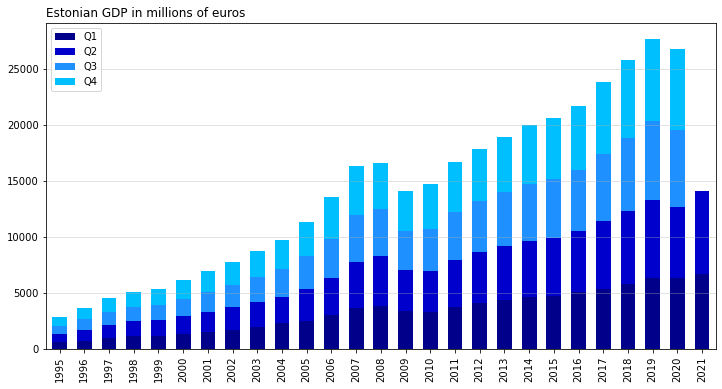

In [5]:
# Visualize data

_ = gdp.plot(kind='bar', legend=True, stacked=True, 
             color=['darkblue', 'mediumblue', 'dodgerblue', 'deepskyblue'],
             width=0.6, figsize=(12, 6))
_ = plt.grid(axis='y', linewidth=0.7, alpha=0.5)
_ = plt.title('Estonian GDP in millions of euros', loc='left', fontsize=12)